## Imports

In [1]:
import sys
import os 
pkg_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(pkg_path)

In [2]:
import shtmbss2.addsrc
from pynn_brainscales import brainscales2 as pynn
from shtmbss2.core import hardware_initialization
from shtmbss2.network import SHTMSingleNeuron

## Configuration

In [3]:
## Configuration
hardware_initialization()

INFO  15:43:49,742  demo_helpers Using setup hxcube7fpga0chip57_1


## Network Initialization

In [4]:
shtm = SHTMSingleNeuron(1, 1)
shtm.init_network()

Starting preprocessing/calibration...


## Network Emulation & Plotting

WARN  15:44:00,779  haldls.MADCConfig encode(): Active mux input select length != 0, channel assignment lags one sample and can't be reliably used due to possible event loss.
Neuron          Spike 0
------------  ---------
point neuron
dendrite        0.00527
soma



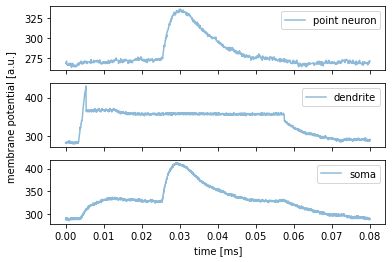

In [5]:
### Emulation and Plotting

%matplotlib inline

shtm.plot_v_exc()

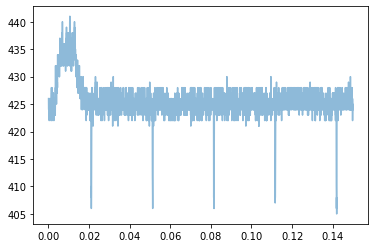

In [12]:
%matplotlib inline


from shtmbss2.plot import plot_membrane


alphabet_range=[0]
neuron_range = [0]
# neuron_range = 'all'
neuron_type = 0

shtm.reset_rec_exc()

if type(neuron_range) is str and neuron_range == 'all':
    neuron_range = range(shtm.num_neurons_per_symbol)
elif type(neuron_range) is list:
    pass
else:
    exit

for alphabet_id in alphabet_range:
    for neuron_id in neuron_range:
        shtm.init_rec_exc(alphabet_id=alphabet_id, neuron_id=neuron_id, neuron_type=neuron_type)
        pynn.run(0.15)
        plot_membrane(shtm.rec_neurons_exc)
        shtm.reset_rec_exc()